In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kieuhinh=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/monan/monanVN/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 564 images belonging to 10 classes.


In [ ]:
validation_data=kieuhinh.flow_from_directory('/content/drive/MyDrive/monan/monanVN/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 99 images belonging to 10 classes.


In [ ]:
training_data.class_indices

{'banhchung': 0,
 'banhdacua': 1,
 'banhkhot': 2,
 'banhmi': 3,
 'cachienxu': 4,
 'chaca': 5,
 'goicuon': 6,
 'nemchua': 7,
 'thitkhotau': 8,
 'xoigac': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(training_data,epochs=50,batch_size=200,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/50
18/18 [==============================] - 210s 11s/step - loss: 3.2236 - accuracy: 0.1170 - val_loss: 2.3169 - val_accuracy: 0.1010
Epoch 2/50
18/18 [==============================] - 17s 943ms/step - loss: 2.2942 - accuracy: 0.1277 - val_loss: 2.2688 - val_accuracy: 0.0909
Epoch 3/50
18/18 [==============================] - 17s 927ms/step - loss: 2.1691 - accuracy: 0.1667 - val_loss: 2.1881 - val_accuracy: 0.1414
Epoch 4/50
18/18 [==============================] - 17s 956ms/step - loss: 2.0703 - accuracy: 0.2429 - val_loss: 2.2777 - val_accuracy: 0.1818
Epoch 5/50
18/18 [==============================] - 17s 922ms/step - loss: 2.0701 - accuracy: 0.2589 - val_loss: 2.0943 - val_accuracy: 0.2020
Epoch 6/50
18/18 [==============================] - 17s 931ms/step - loss: 2.0311 - accuracy: 0.2376 - val_loss: 2.0563 - val_accuracy: 0.2323
Epoch 7/50
18/18 [==============================] - 17s 940ms/step - loss: 2.0357 - accuracy: 0.2216 - val_loss: 2.0691 - val_accuracy: 0.2626


<function matplotlib.pyplot.show>

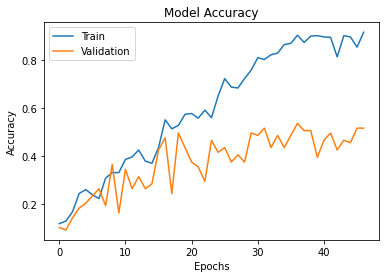

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Nhan_dien_thuc_an.h5")

In [ ]:
model_nhandien=load_model('Nhan_dien_thuc_an.h5')

xoigac


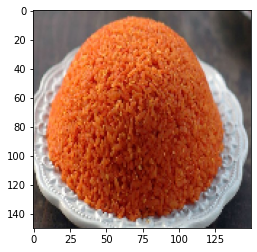

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/xoigac.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

banhchung


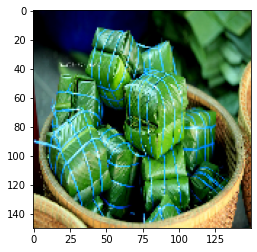

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/banhchung.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

nemchua


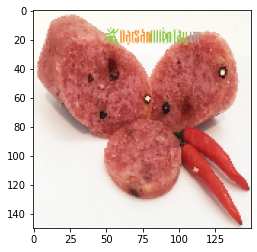

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/nemchua.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

goicuon


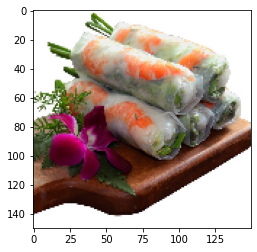

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/goicuon.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

goicuon


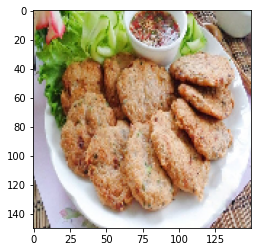

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/chaca.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

cachienxu


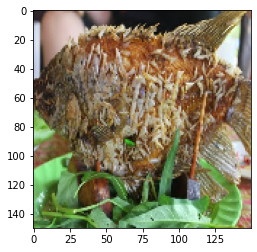

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/cachienxu.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

banhmi


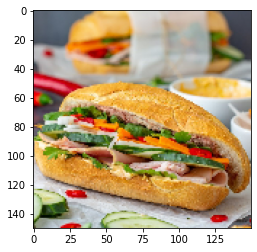

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/banhmi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

banhkhot


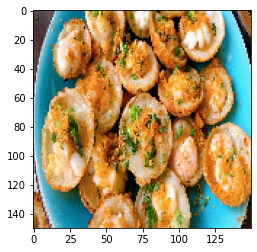

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/banhkhot.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)

banhdacua


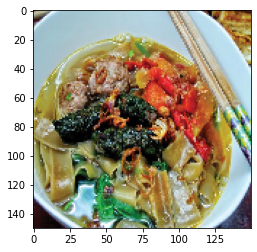

In [ ]:
img=load_img("/content/drive/MyDrive/monan/monanVN/test/banhdacua.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhandien.predict(img)
if round(result[0][0])==1:
  prediction='banhchung'
if round(result[0][1])==1:
  prediction='banhdacua'
if round(result[0][2])==1:
  prediction='banhkhot'
if round(result[0][3])==1:
  prediction='banhmi'
if round(result[0][4])==1:
  prediction='cachienxu'
if round(result[0][5])==1:
  prediction='chaca'
if round(result[0][6])==1:
  prediction='goicuon'
if round(result[0][7])==1:
  prediction='nemchua'
if round(result[0][8])==1:
  prediction='thitkhotau'
if round(result[0][9])==1:
  prediction='xoigac'
print(prediction)